In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import random
import copy
import time
from tqdm import tqdm

In [2]:
df = pd.read_csv('Data_Set/got/asoiaf-all-edges.csv')
df = df.drop(columns=['Type', 'id', 'weight'])

In [3]:
df

,Source,Target
0,Addam-Marbrand,Brynden-Tully
1,Addam-Marbrand,Cersei-Lannister
2,Addam-Marbrand,Gyles-Rosby
3,Addam-Marbrand,Jaime-Lannister
4,Addam-Marbrand,Jalabhar-Xho
...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke
2819,Waymar-Royce,Will-(prologue)
2820,Weasel,Weese
2821,Woth,Yoren


In [4]:
G = nx.from_pandas_edgelist(df, 'Source', 'Target', create_using=nx.Graph())

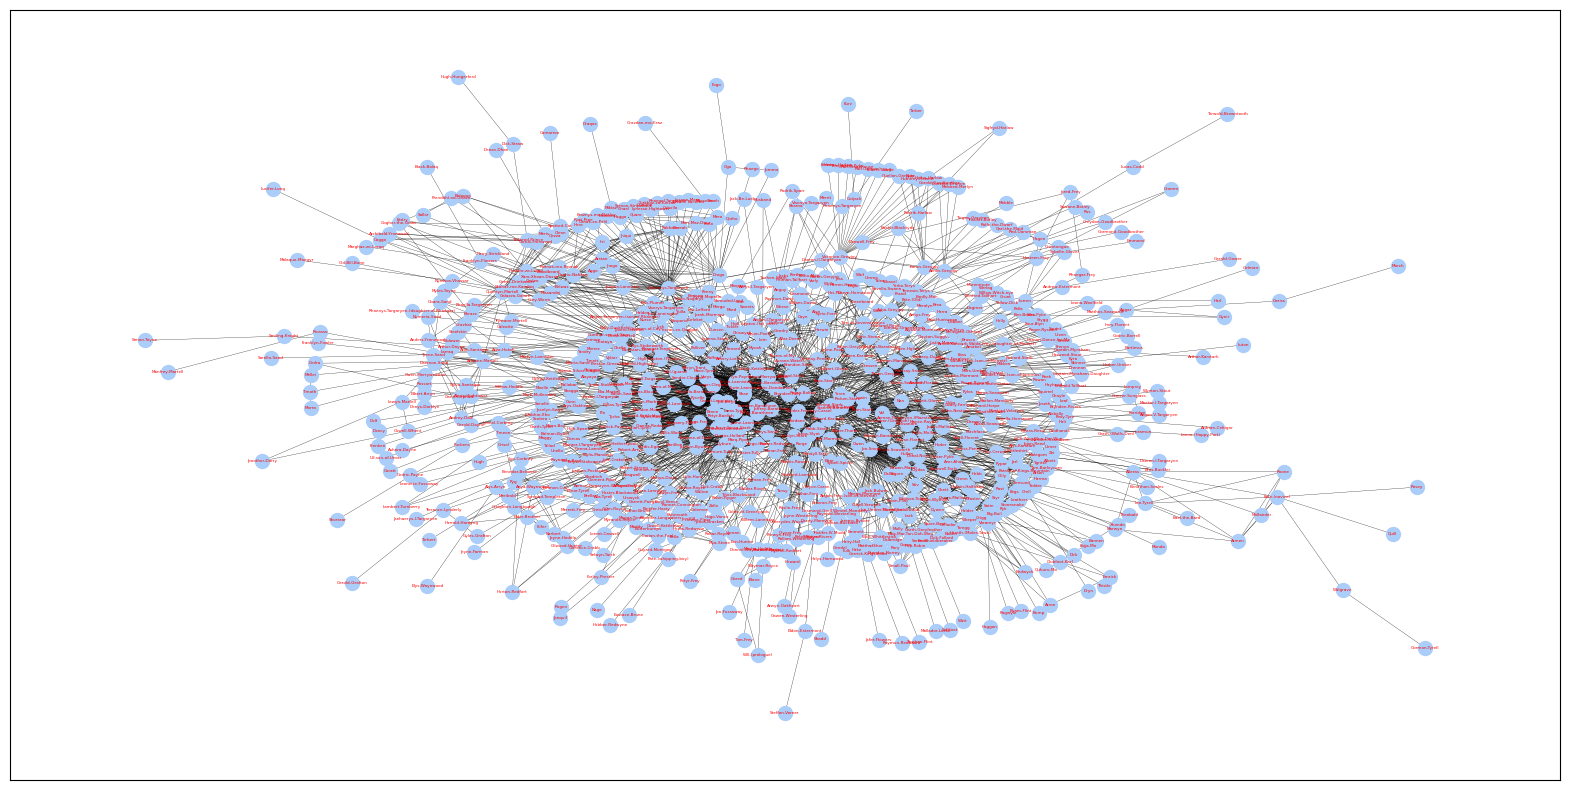

In [5]:
plt.figure(figsize=(20,10))
nx.draw_networkx(G,pos=nx.kamada_kawai_layout(G),node_size=100,font_size=3,font_color='red',node_color='#abcdf9',width=0.2)

In [6]:
def node_verification(positions,node_list):
    nodes = []
    for i in positions:
        nodes.append(node_list[i])
    ocorrencias_por_elemento = {elem: nodes.count(elem) for elem in set(nodes)}
    
    maior_valor = max(ocorrencias_por_elemento.values())
    chaves_maiores_valores = [chave for chave, valor in ocorrencias_por_elemento.items() if valor == maior_valor]
    node = random.choice(chaves_maiores_valores)
    return node

In [7]:
df = nx.to_pandas_adjacency(G)
stop = 0
report  = pd.DataFrame(columns=['Parada','Época', 'Nº Clusters', 'Clusters Names', 'Clusters Sizes','Node List'])
tempo_inicio = time.time()
limite_tempo = 30
for test in tqdm(range(10)):
    df = nx.to_pandas_adjacency(G)
    node_list = df.index.tolist()
    stop_count = 0
    epoca = 0
    stop += 2
    while True:
        epoca += 1
        clusters = len(pd.Series(node_list).value_counts())
        new_node_list = []
        for linha in range(len(df)):
            lista = nx.to_numpy_array(G)[linha].tolist()
            positions = [i for i, valor in enumerate(lista) if valor == 1]
            node = node_verification(positions,node_list)

            new_node_list.append(node)
        node_list = new_node_list
        current_clusters = len(pd.Series(node_list).value_counts())

        if clusters == current_clusters:
            stop_count += 1
        else:
            stop_count = 0

        if stop_count == stop:
            break
        print(stop_count, end=' - ')
        
    lista_aux = copy.copy(node_list)

    number_clusters = len((pd.Series(lista_aux)).value_counts())
    clusters_names = (pd.Series(lista_aux)).value_counts().index.tolist()
    clusters_size  = (pd.Series(lista_aux)).value_counts().tolist()
    
    report.loc[len(report)] = [stop,epoca, number_clusters, clusters_names, clusters_size, lista_aux]


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 1 - 

 10%|████▍                                       | 1/10 [00:46<07:00, 46.69s/it]

0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 1 - 0 - 0 - 1 - 2 - 0 - 1 - 2 - 3 - 

 20%|████████▊                                   | 2/10 [01:51<07:39, 57.43s/it]

0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 1 - 2 - 0 - 0 - 0 - 1 - 2 - 3 - 4 - 5 - 

 30%|█████████████▏                              | 3/10 [03:10<07:50, 67.26s/it]

0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 1 - 0 - 0 - 1 - 2 - 3 - 0 - 0 - 0 - 1 - 2 - 3 - 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 

 40%|█████████████████▌                          | 4/10 [04:35<07:25, 74.22s/it]

0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 1 - 0 - 0 - 1 - 0 - 0 - 1 - 2 - 3 - 4 - 5 - 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 

 50%|██████████████████████                      | 5/10 [06:06<06:41, 80.23s/it]

0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 1 - 0 - 0 - 0 - 1 - 2 - 3 - 0 - 1 - 2 - 3 - 4 - 5 - 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 

 60%|██████████████████████████▍                 | 6/10 [07:47<05:48, 87.21s/it]

0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 1 - 0 - 0 - 1 - 2 - 3 - 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 

 70%|██████████████████████████████▊             | 7/10 [09:13<04:21, 87.09s/it]

0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 1 - 0 - 0 - 0 - 1 - 2 - 3 - 0 - 0 - 0 - 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 

 80%|███████████████████████████████████▏        | 8/10 [10:44<02:56, 88.26s/it]

0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 1 - 2 - 0 - 1 - 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 

 90%|██████████████████████████████████████▋    | 9/10 [12:55<01:41, 101.52s/it]

0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 0 - 1 - 0 - 1 - 0 - 1 - 2 - 3 - 4 - 0 - 1 - 2 - 3 - 4 - 0 - 1 - 2 - 3 - 4 - 0 - 1 - 2 - 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 

100%|███████████████████████████████████████████| 10/10 [15:17<00:00, 91.77s/it]


In [8]:
report

,Parada,Época,Nº Clusters,Clusters Names,Clusters Sizes,Node List
0,2,20,18,"[Cersei-Lannister, Samwell-Tarly, Drogo, Theon...","[476, 120, 72, 31, 28, 15, 14, 11, 10, 5, 5, 2...","[Cersei-Lannister, Cersei-Lannister, Cersei-La..."
1,4,27,13,"[Cersei-Lannister, Jon-Snow, Daenerys-Targarye...","[493, 120, 84, 26, 25, 15, 14, 11, 3, 2, 1, 1, 1]","[Cersei-Lannister, Cersei-Lannister, Cersei-La..."
2,6,29,17,"[Brienne-of-Tarth, Jon-Snow, Jorah-Mormont, Br...","[424, 111, 78, 50, 36, 15, 14, 14, 14, 11, 8, ...","[Brienne-of-Tarth, Brienne-of-Tarth, Brienne-o..."
3,8,35,11,"[Jaime-Lannister, Jon-Snow, Drogo, Victarion-G...","[521, 122, 77, 18, 15, 14, 11, 11, 4, 2, 1]","[Jaime-Lannister, Jaime-Lannister, Jaime-Lanni..."
4,10,37,9,"[Jaime-Lannister, Jon-Snow, Hizdahr-zo-Loraq, ...","[558, 121, 71, 15, 14, 11, 3, 2, 1]","[Jaime-Lannister, Jaime-Lannister, Jaime-Lanni..."
5,12,42,20,"[Catelyn-Stark, Mance-Rayder, Cersei-Lannister...","[258, 168, 142, 85, 20, 20, 15, 14, 13, 13, 11...","[Cersei-Lannister, Catelyn-Stark, Cersei-Lanni..."
6,14,36,14,"[Qyburn, Jon-Snow, Jhogo, Victarion-Greyjoy, R...","[480, 124, 86, 27, 25, 15, 14, 11, 5, 3, 2, 2,...","[Qyburn, Qyburn, Qyburn, Qyburn, Qyburn, Qybur..."
7,16,38,11,"[Tyrion-Lannister, Jeor-Mormont, Barristan-Sel...","[493, 116, 81, 30, 29, 14, 14, 11, 5, 2, 1]","[Tyrion-Lannister, Tyrion-Lannister, Tyrion-La..."
8,18,53,12,"[Joffrey-Baratheon, Jon-Snow, Irri, Aeron-Grey...","[496, 125, 73, 30, 24, 14, 14, 11, 5, 2, 1, 1]","[Joffrey-Baratheon, Joffrey-Baratheon, Joffrey..."
9,20,58,11,"[Cersei-Lannister, Eddison-Tollett, Irri, Theo...","[515, 111, 92, 28, 14, 14, 11, 5, 3, 2, 1]","[Cersei-Lannister, Cersei-Lannister, Cersei-La..."


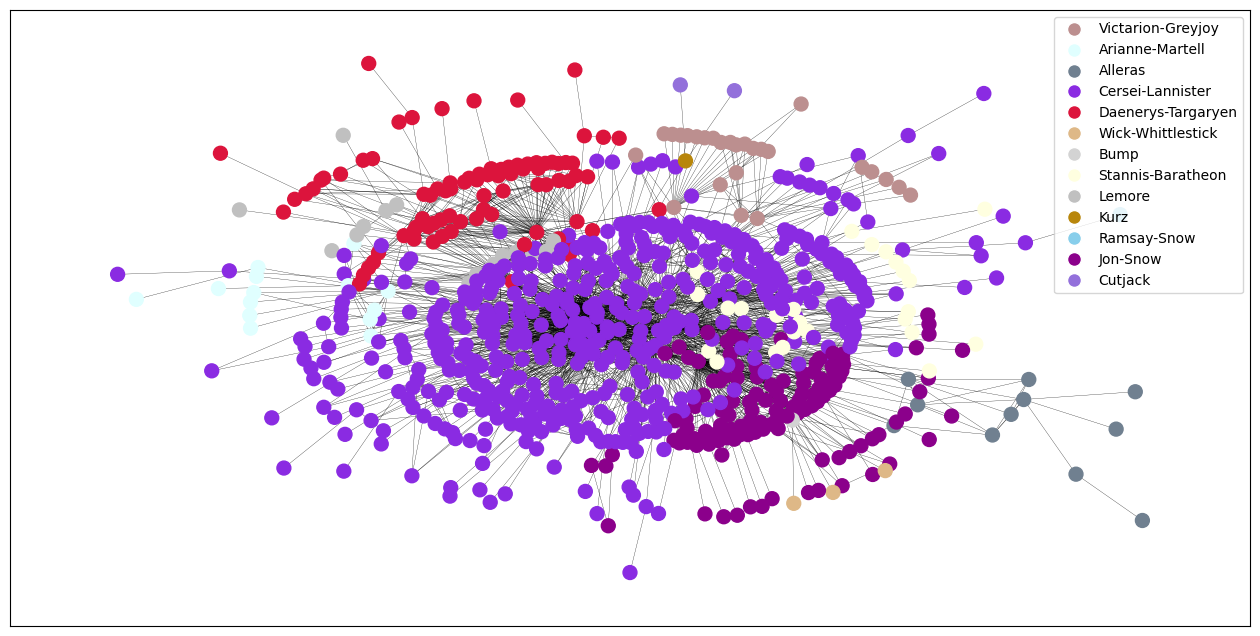

In [9]:
lista_aux = report['Node List'].iloc[1]
cores = list(mcolors.CSS4_COLORS.keys())
random.shuffle(cores)
nodes = list(set(lista_aux))
lista_cores = copy.copy(lista_aux)
for j in range(len(nodes)):
    for i in range(len(lista_cores)):
        if lista_cores[i] == nodes[j]:
            lista_cores[i] = cores[j]
            
plt.figure(figsize=(16,8))
nx.draw_networkx(G,pos=nx.kamada_kawai_layout(G),node_size=100,font_size=10,font_color='red',node_color=lista_cores,width=0.2,with_labels=False)
legenda = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cores[i], markersize=10, label=nodes[i]) for i in range(len(nodes))]
plt.legend(handles=legenda, loc='upper right')
plt.show()